### Cross Validation on Paris Housing

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor

from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [56]:
data = pd.read_csv('./ParisHousing.csv')

In [57]:
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [58]:
data.shape

(10000, 17)

In [59]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [62]:
data.duplicated().sum()

0

In [63]:
data.isnull().mean()*100

squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
dtype: float64

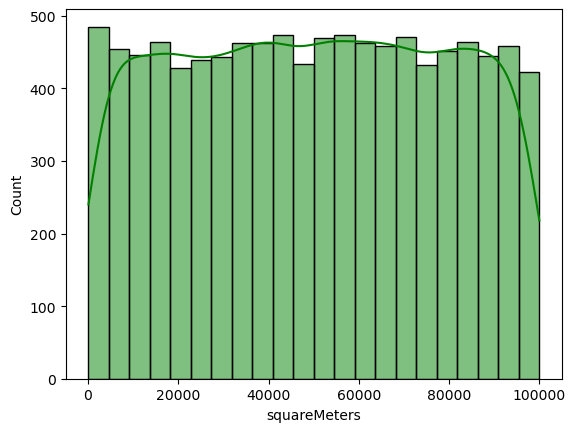

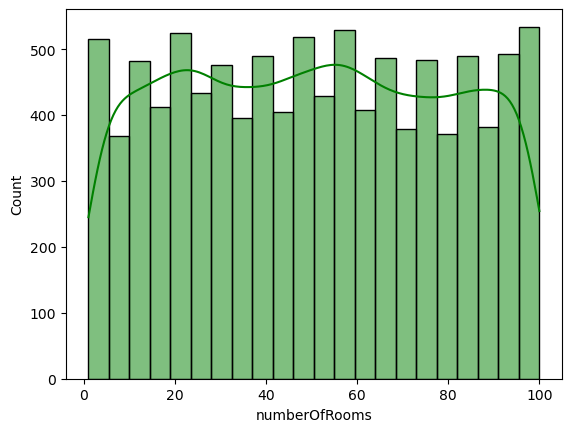

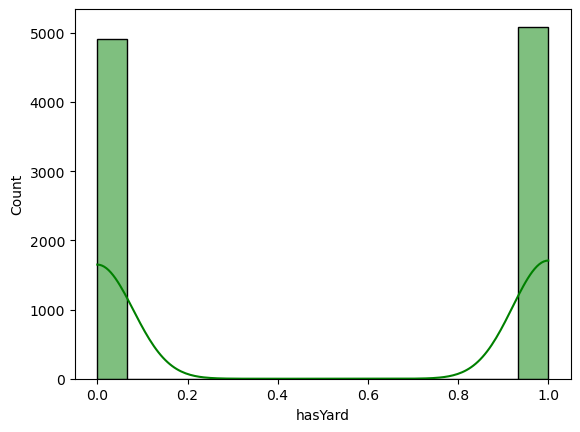

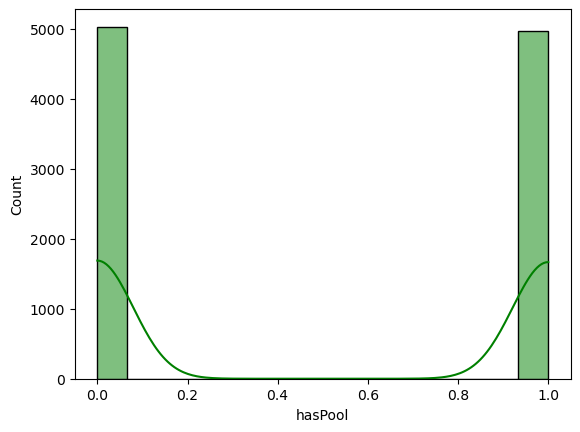

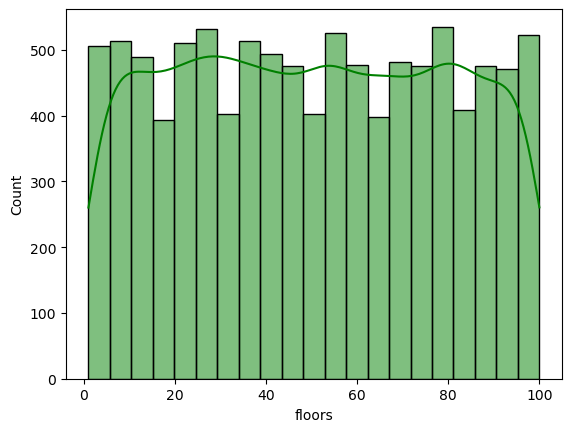

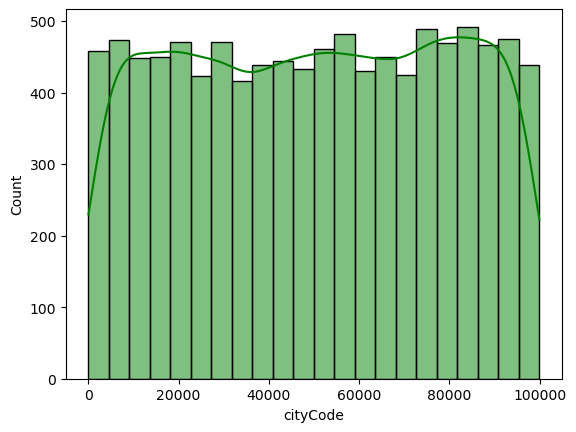

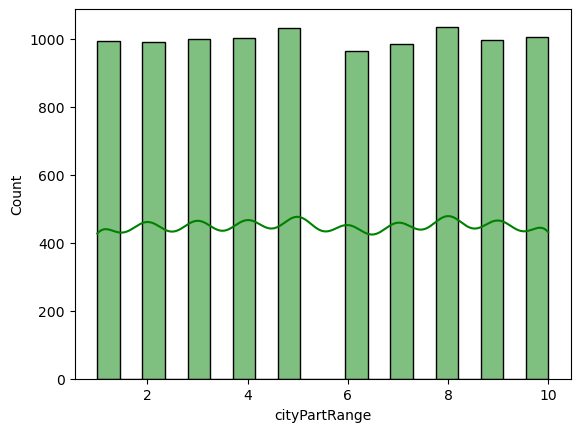

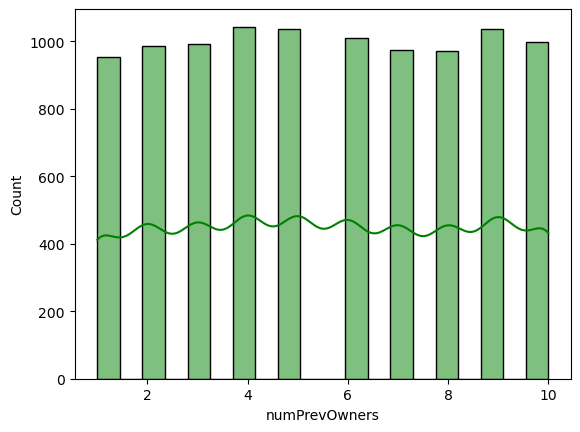

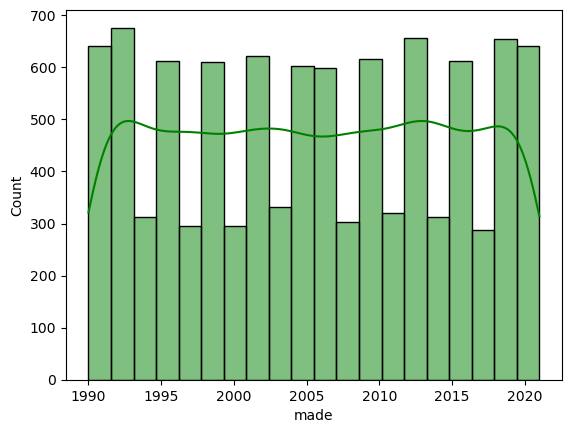

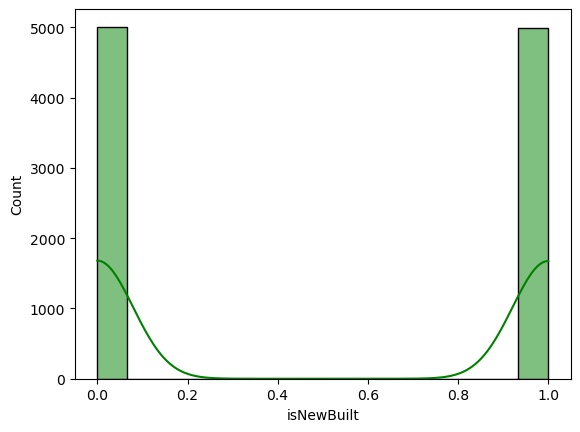

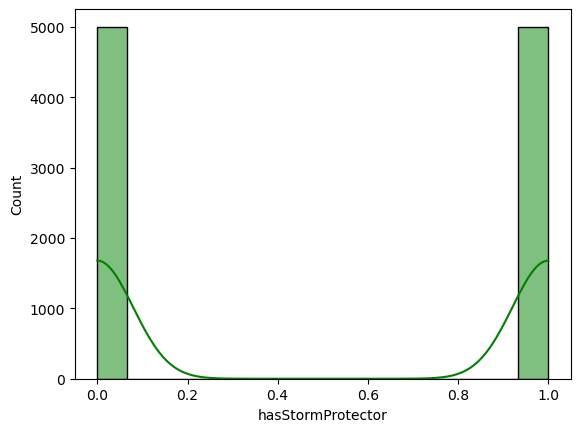

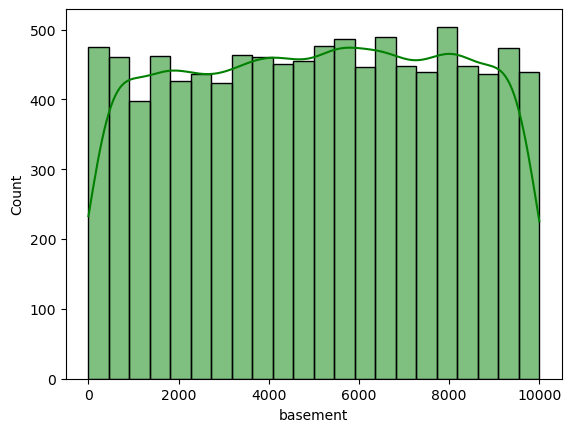

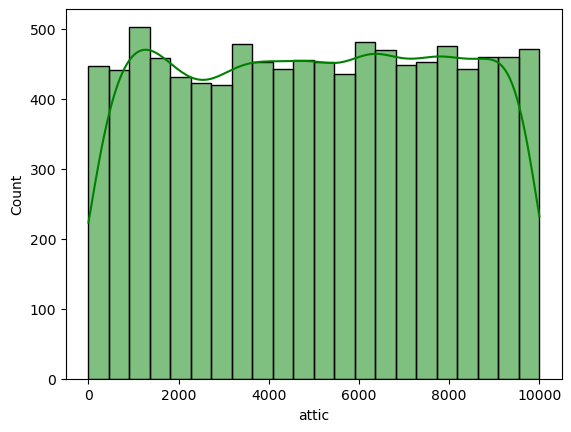

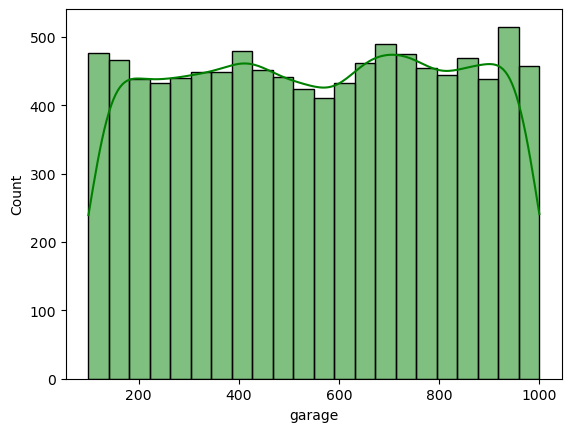

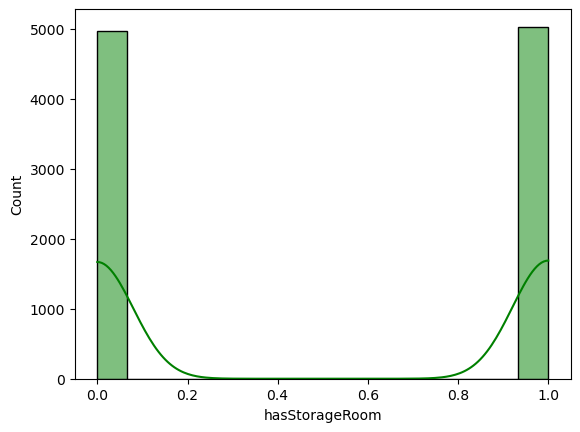

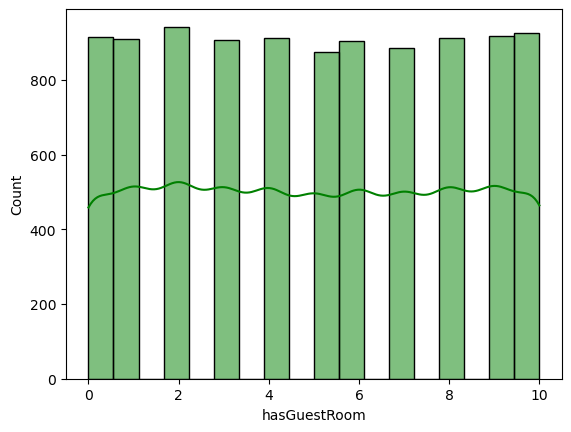

In [64]:
for i in data.columns:
    if data[i].dtype != float:
        sns.histplot(x=data[i],kde=True , color='green')
    
        plt.show()

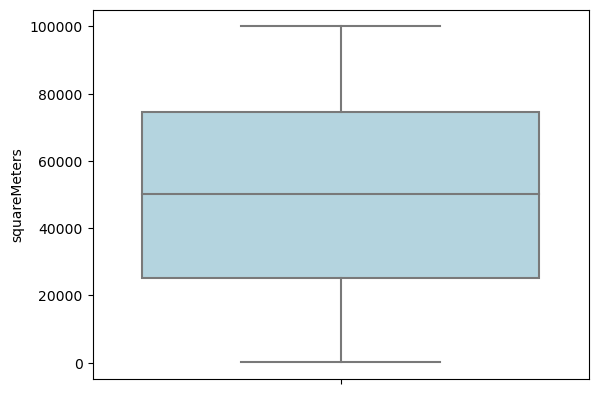

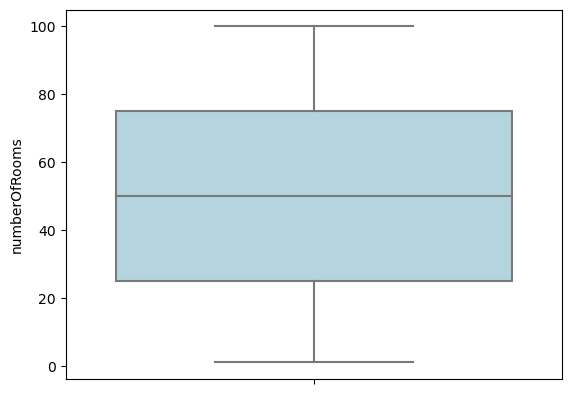

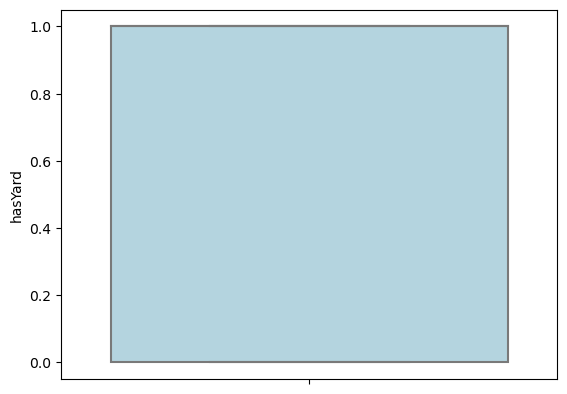

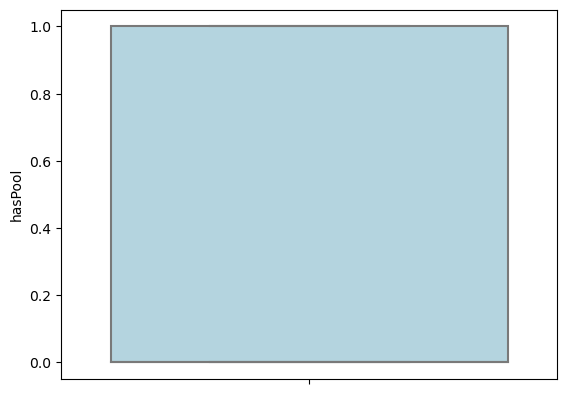

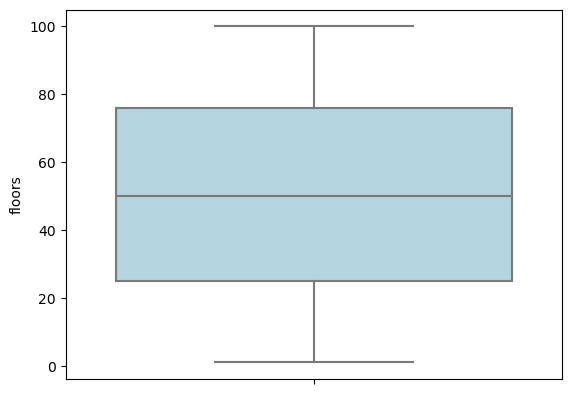

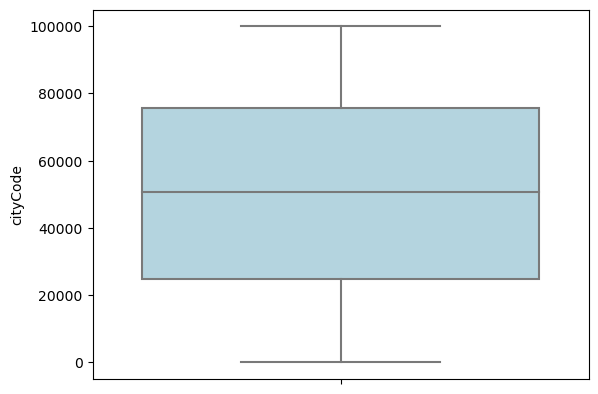

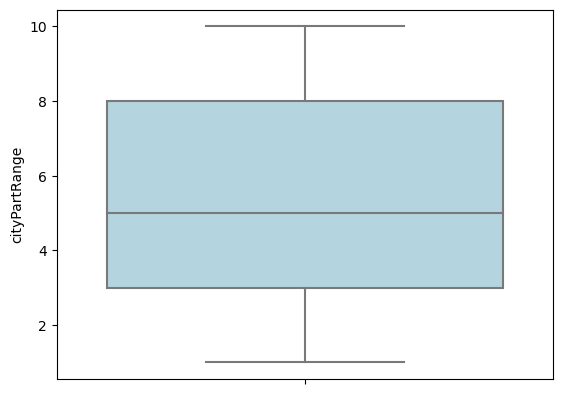

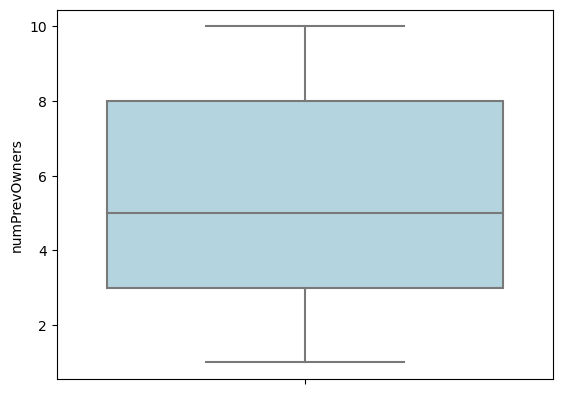

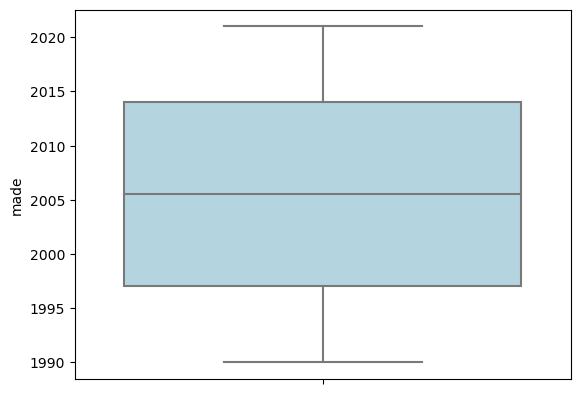

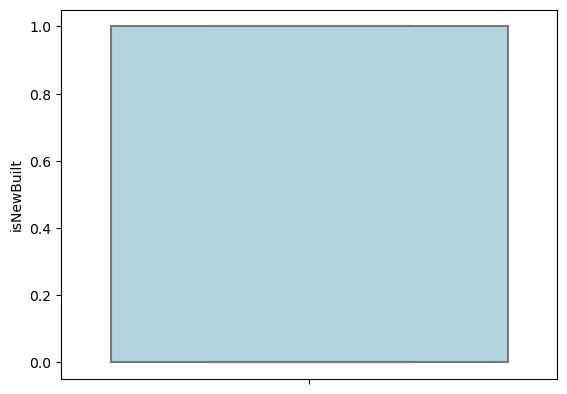

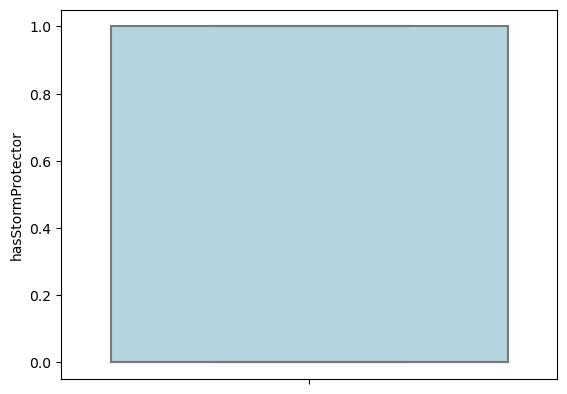

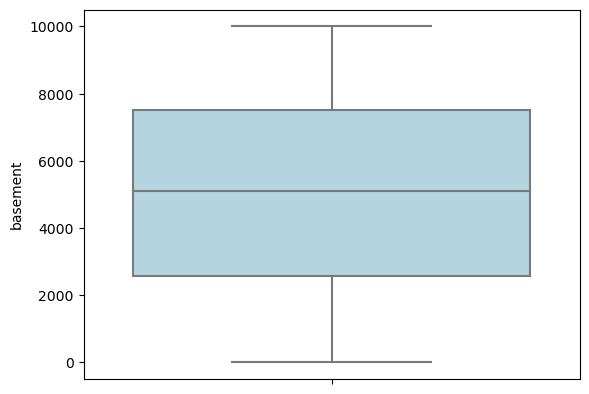

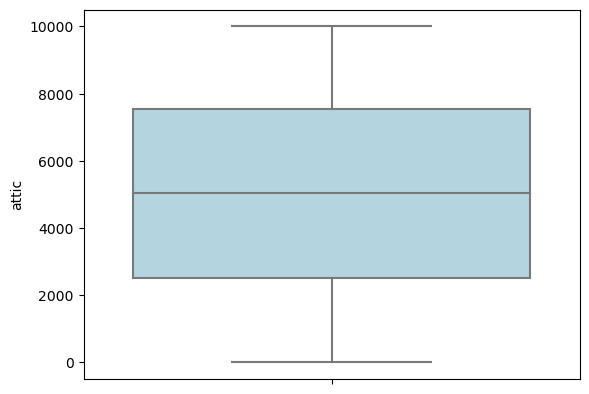

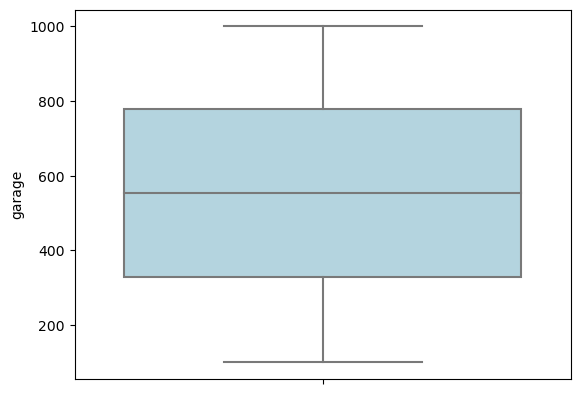

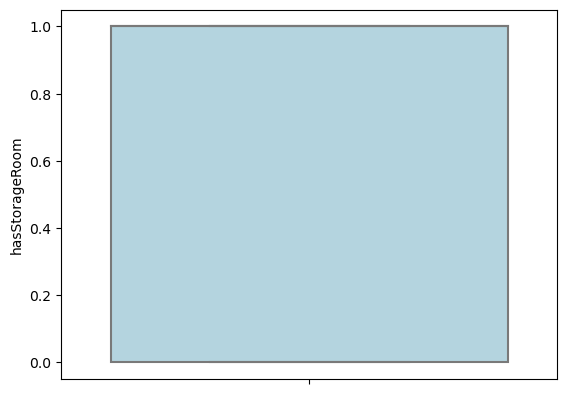

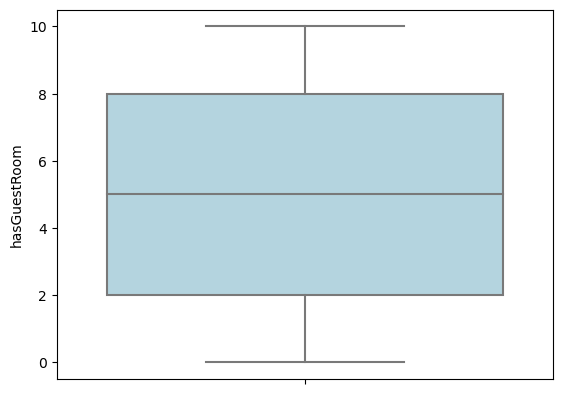

In [65]:
for i in data.columns:
    if data[i].dtype != float:
        sns.boxplot(y = data[i],color = 'LightBlue')
        plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

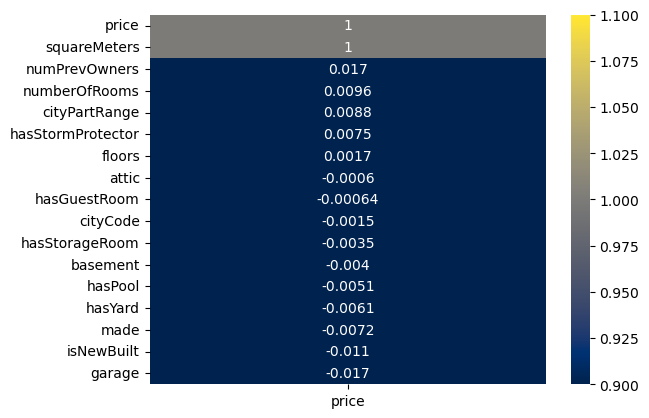

In [66]:
sns.heatmap(data.corr()[['price']].sort_values(by= 'price',ascending = False),vmax= 1,vmin = 1,annot = True,cmap= 'cividis')
plt.show

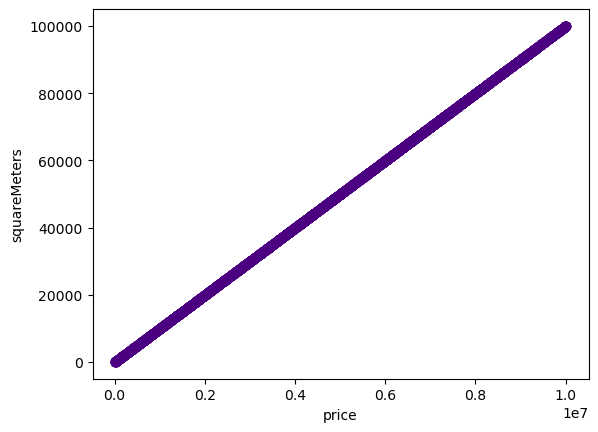

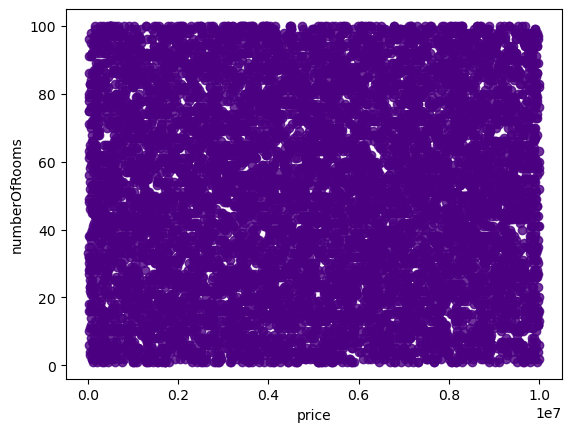

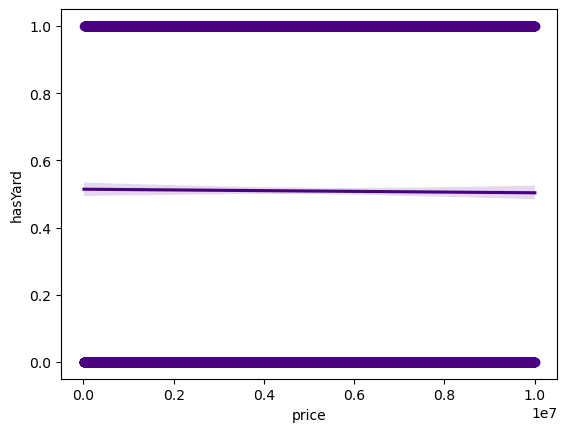

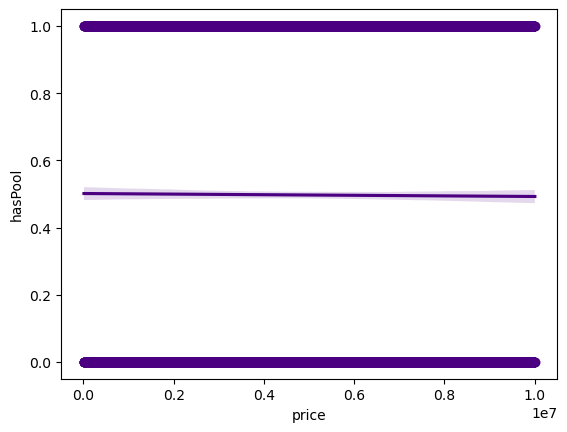

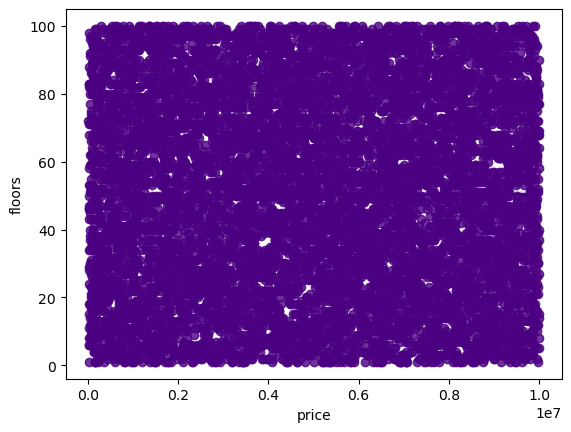

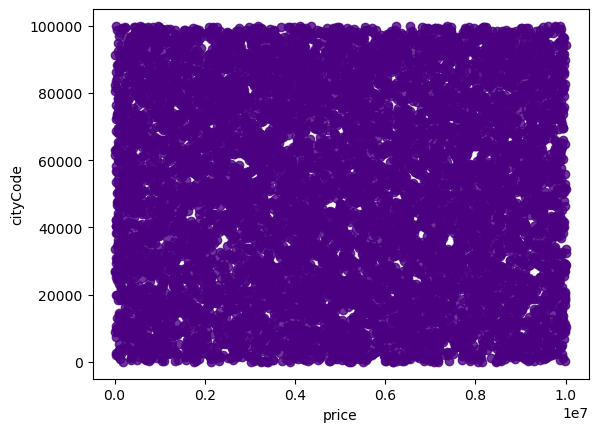

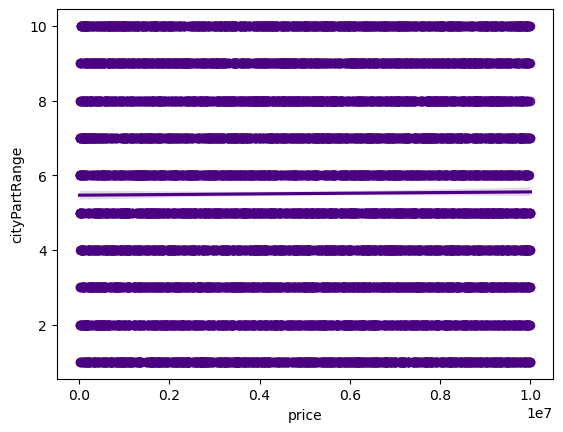

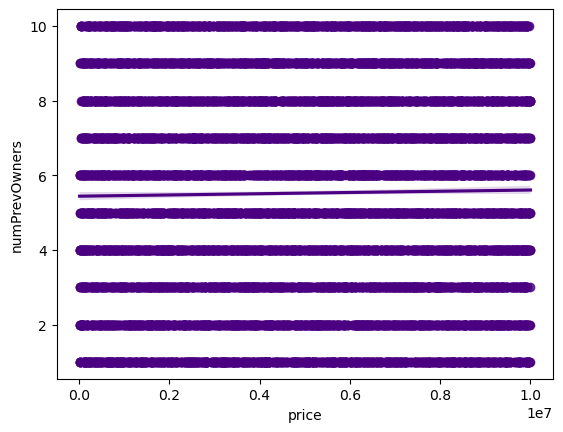

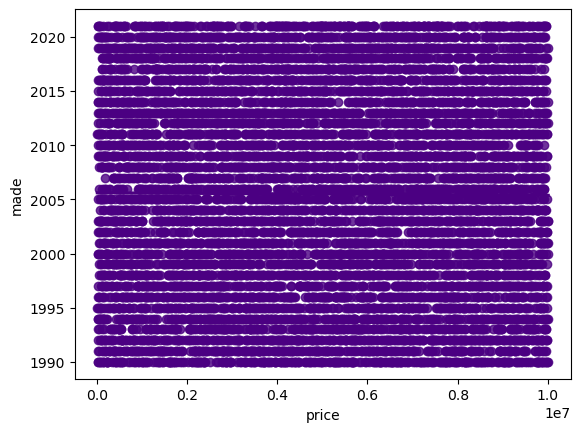

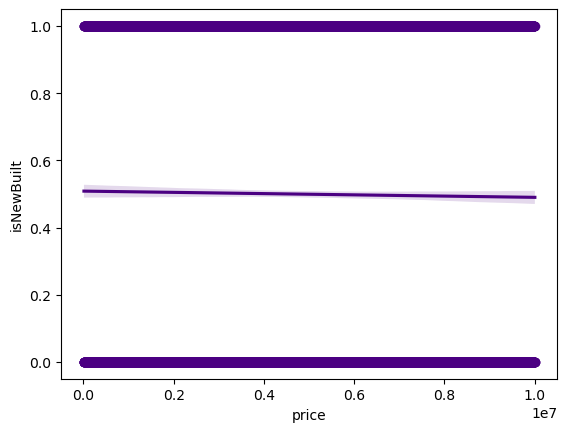

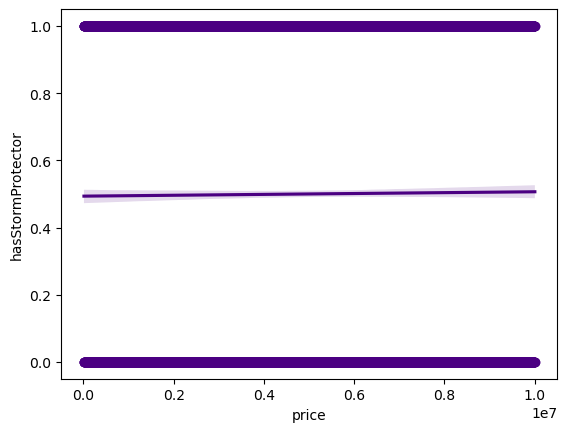

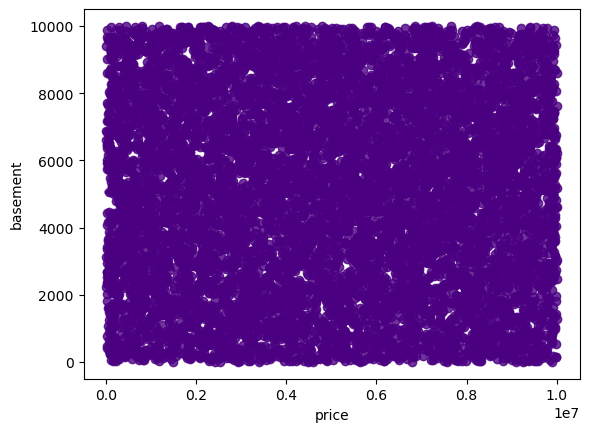

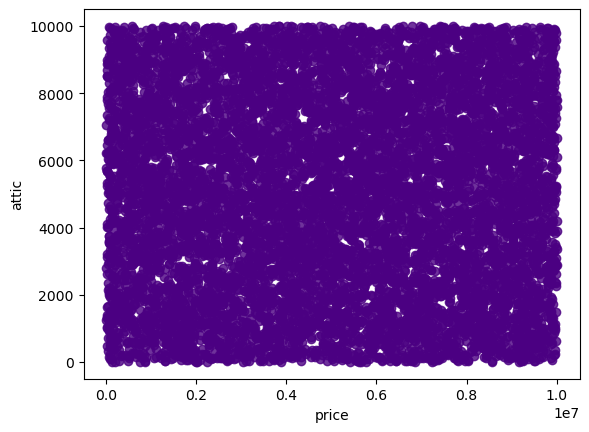

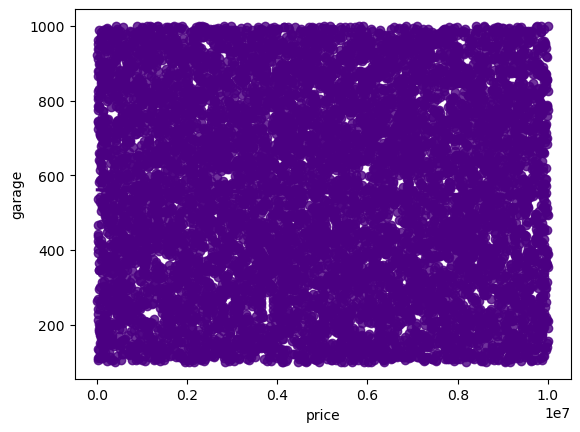

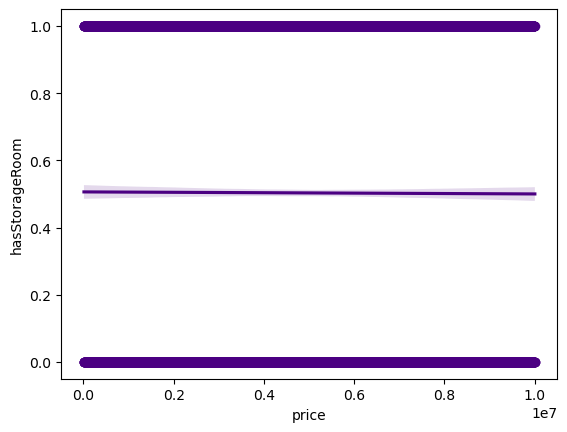

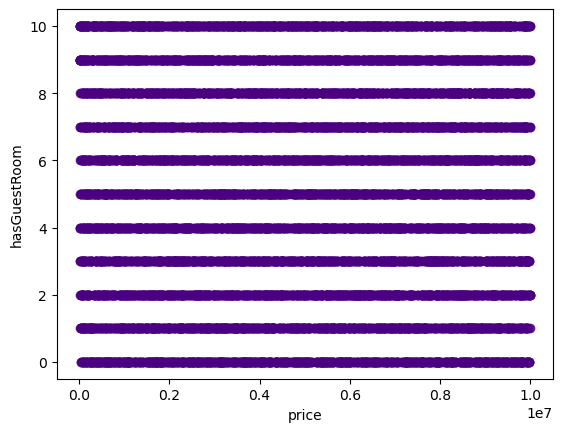

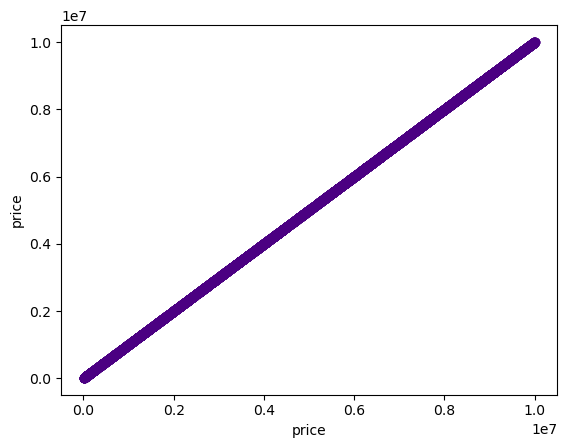

In [67]:
for i in data:
    sns.regplot(y = data[i],x = 'price',data = data,color = 'indigo')
    plt.show()

In [68]:
x = data.iloc[:,:-1].values
x

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]], dtype=int64)

In [69]:
y = data.iloc[:,-1].values
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [70]:
sc = StandardScaler()

In [71]:
x = sc.fit_transform(x)
x

array([[ 0.89156241, -1.64351831, -1.01755405, ...,  1.53748782,
        -1.00601811,  0.63137326],
       [ 1.07395603, -0.39418009,  0.98274878, ..., -1.62237047,
         0.99401789, -0.9428096 ],
       [ 0.20303346,  0.26519286, -1.01755405, ..., -1.59565669,
         0.99401789,  1.26104641],
       ...,
       [ 1.18065352, -1.64351831, -1.01755405, ..., -0.79424336,
         0.99401789,  1.26104641],
       [ 0.31855868,  0.68163893, -1.01755405, ..., -0.81714088,
         0.99401789, -0.31313646],
       [-1.68318347,  1.16749268, -1.01755405, ..., -1.04993237,
         0.99401789,  0.31653669]])

In [72]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostingRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state = 0)
}

In [74]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=15,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rsme = np.sqrt(-scores)
    rsme_average = np.mean(rsme)
    print("AVERAGE RSME: ",rsme_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RSME:  1899.1252542127236
****************************************************************************************************
cross validation model : Ridge
AVERAGE RSME:  1924.1455930487673
****************************************************************************************************
cross validation model : Lasso
AVERAGE RSME:  1899.0472899062652
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RSME:  5754560.646687415
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RSME:  5246.374232811196
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RSME:  20467.75486942729
*********************************************************

In [75]:
model= LinearRegression()

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42, shuffle = True)
x_test.shape

(3000, 16)

In [89]:
model.fit(x_train, y_train)

LinearRegression()

In [90]:
y_pred = model.predict(x_test)
y_pred

array([7962604.24888725, 3715858.52278415, 8553855.41160022, ...,
       5220203.92605014, 5864616.84327634, 4829125.46774529])

In [91]:
r2_score=y_test,y_pred

In [92]:
model.score(x_test, y_test)

0.9999995771430428

In [93]:
model.score(x_train, y_train)

0.9999995594006124

### MAE

In [94]:
mean_absolute_error(y_test, y_pred)

1485.2080395501907

In [95]:
mean_squared_error(y_test, y_pred)

3605360.356640698

### MSE

In [96]:
np.sqrt(mean_squared_error(y_test,y_pred))

1898.7786486688483

In [97]:
Output = pd.DataFrame(zip(y_test, y_pred), columns=['Actual', 'Prediction'])
Output.head()

,Actual,Prediction
0,7964369.6,7.962604e+06
1,3713548.9,3.715859e+06
2,8553019.2,8.553855e+06
3,6428666.2,6.430595e+06
4,6465184.9,6.465267e+06


In [98]:
Output=Output.astype('float64')
Output.head()

,Actual,Prediction
0,7964369.6,7.962604e+06
1,3713548.9,3.715859e+06
2,8553019.2,8.553855e+06
3,6428666.2,6.430595e+06
4,6465184.9,6.465267e+06


### Plotting the Result

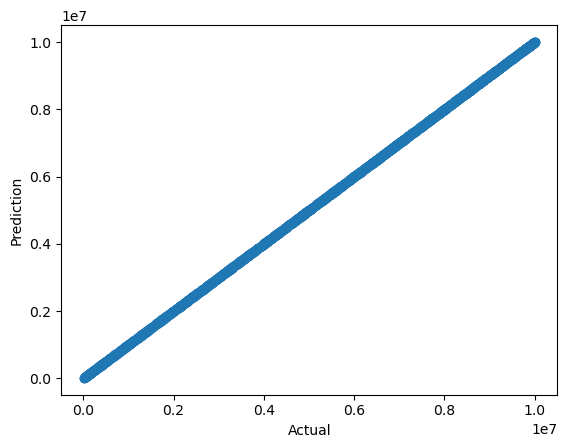

In [87]:
sns.regplot(data=Output, x='Actual', y='Prediction')
plt.show()